<a href="https://colab.research.google.com/github/AzShet/MI-LAB01/blob/develop/data_mining_lab01_ruelas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Base de datos del UCI Machine Learning Repository
Nombre de mi datast: Wine Quality Dataset
Enlace de UCI ML repository: https://archive.ics.uci.edu/dataset/186/wine+quality
Descripción: Esta BD contiene información sobre las propiedades fisicoquímicas de vinos tintos y blancos, tambien su respectiva evaluación de calidad(de 0 a 10).

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import pandas as pd

# cargando el dataet
wine_path = '/content/drive/MyDrive/5 ciclo/Semana 1/Lab/datasets/winequality-white.csv'
wine_df = pd.read_csv(wine_path, delimiter=';')  # mi archivo esta separao por -> ;

In [12]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### issue when i try to import dataset xd

In [3]:
from ucimlrepo import fetch_ucirepo
# fetch dataset
wine_quality = fetch_ucirepo(id=186)

ModuleNotFoundError: No module named 'ucimlrepo'

In [ ]:
  # data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)

# 2. Base de datos de Kaggle
Nombre de mi datast: House Prices - Advanced Regression Techniques
Enlace de UCI ML repository: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/rules


In [13]:
# Cargar el House Prices Dataset
house_path = '/content/drive/MyDrive/5 ciclo/Semana 1/Lab/datasets/train.csv'
house_df = pd.read_csv(house_path)

In [14]:
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 3. Procesamiento de la data

In [25]:
# a. Leer y almacenar en un DataFrame
print("Wine Quality Dataset:")
print(f"Registros: {wine_df.shape[0]}, Atributos: {wine_df.shape[1]}")

Wine Quality Dataset:
Registros: 4898, Atributos: 12


In [26]:
print("\nHouse Prices Dataset:")
print(f"Registros: {house_df.shape[0]}, Atributos: {house_df.shape[1]}")


House Prices Dataset:
Registros: 1460, Atributos: 81


In [27]:
# b. Determinar variables numéricas y no numéricas, y valores perdidos
def describe_dataset(df, name):
    print(f"\nAnálisis de {name}:")
    print("\nTipos de variables:")
    print(df.dtypes)

    print("\nValores perdidos:")
    print(df.isnull().sum())

describe_dataset(wine_df, "Wine Quality Dataset")


Análisis de Wine Quality Dataset:

Tipos de variables:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Valores perdidos:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [28]:
describe_dataset(house_df, "House Prices Dataset")


Análisis de House Prices Dataset:

Tipos de variables:
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

Valores perdidos:
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [29]:
# c. Calcular estadísticos descriptivos para variables numéricas
def numeric_stats(df, name):
    print(f"\nEstadísticos descriptivos para {name}:")
    print(df.describe())

numeric_stats(wine_df, "Wine Quality Dataset")


Estadísticos descriptivos para Wine Quality Dataset:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.0029

In [30]:
numeric_stats(house_df.select_dtypes(include=['float64', 'int64']), "House Prices Dataset")


Estadísticos descriptivos para House Prices Dataset:
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799   

## Analisis de relleno para justificar nota del LAB  :D

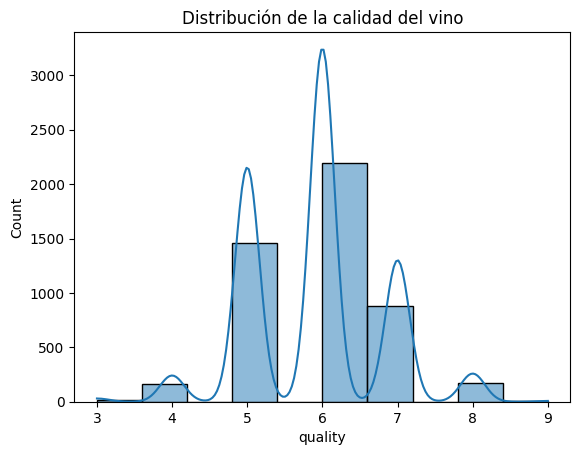

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma de la calidad del vino
sns.histplot(wine_df['quality'], bins=10, kde=True)
plt.title("Distribución de la calidad del vino")
plt.show()

manejo de valores perdidos

In [32]:
# Eliminar columnas con más del 50% de valores perdidos
threshold = len(house_df) * 0.5
house_df_cleaned = house_df.dropna(thresh=threshold, axis=1)

In [34]:
describe_dataset(house_df, "House Prices Dataset")


Análisis de House Prices Dataset:

Tipos de variables:
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

Valores perdidos:
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


una correlación

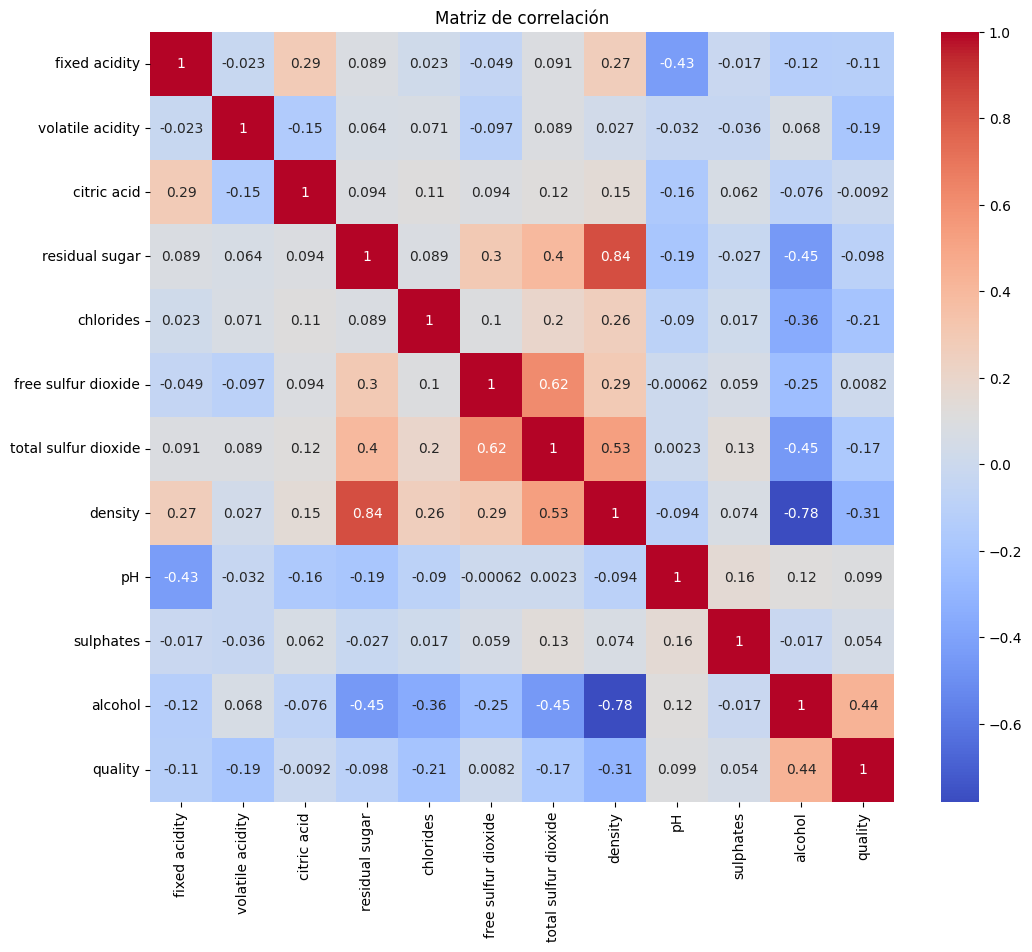

In [36]:
# Matriz de correlación para el Wine Quality Dataset
correlation_matrix = wine_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()

Con esto ya se podría continuar a una limpieza de datos más profunda para luego intentar hacer un modelo predictivo, un analisis de BI o un dashboard en otra plataforma como tableu o powerbi